In [8]:
import os.path as op
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [6]:
data_folder = "/scratch/hyruuk/neuromod/shinobi2023"
data_pattern = op.join(data_folder, 'shinobi_training/*/*/*/*.json')

files_list = glob.glob(data_pattern)


data_dict = {"Subject":[],
             "Level":[],
             "Timestamp":[],
             "Date":[],
             "Value":[]}
for file in files_list:
    with open(file, "r") as rf:
        data = json.load(rf)
    data_dict["Subject"].append(file.split('/')[6])
    data_dict["Level"].append(data["Level"][-3:])
    data_dict["Timestamp"].append(data["LevelStartTimestamp"])
    data_dict["Date"].append(data["LevelStartTime"])
    if int(data["Level"][-3]) == 1:
        value = 0
    elif int(data["Level"][-3]) == 4:
        value = 1
    elif int(data["Level"][-3]) == 5:
        value = 2
    data_dict["Value"].append(value)
    
    
data_df = pd.DataFrame(data_dict)
# trim data dict from sub-03 data
data_df = data_df[data_df["Subject"]!="sub-03"]

data_df.to_csv("/scratch/hyruuk/neuromod/shinobi2023/shinobi_training/timestamps_data.tsv", sep="\t")
data_df = data_df.set_index("Timestamp")

KeyboardInterrupt: 

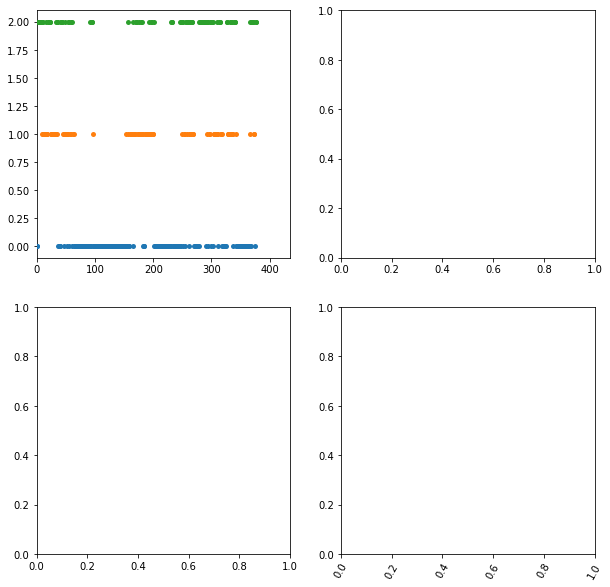

In [148]:
import seaborn as sns

figure, axis = plt.subplots(2, 2, figsize=(10,10))
ax_flat = axis.flatten()
plt.xticks(rotation=60)
for idx, subj in enumerate(np.unique(data_df["Subject"])):
    sub_df = data_df[data_df["Subject"]==subj]
    sns.swarmplot(data=sub_df, x=[datetime.fromtimestamp(x) for x in sub_df.index], 
                    y="Value", hue="Level", hue_order=["1-0", "4-1", "5-0"],
                    ax=ax_flat[idx])
    ax_flat[idx].set_title(subj)
    ax_flat[idx].tick_params(axis='x', labelrotation=45)
    ax_flat[idx].set_yticks([])
    ax_flat[idx].set_ylabel("")
plt.tight_layout()

In [ ]:
sns.swarmplot(data=data_df, x=[datetime.fromtimestamp(x) for x in data_df.index], 
                y="Subject", hue="Level", hue_order=["1-0", "4-1", "5-0"])

In [11]:
np.random.random(10)

array([0.25747499, 0.9933921 , 0.05339256, 0.74827924, 0.32228212,
       0.47994338, 0.43587451, 0.0979382 , 0.30902226, 0.54965307])

In [5]:
import pickle

with open("/scratch/hyruuk/neuromod/shinobi2023/shinobi_training/timestamps_data.tsv", "w") as f:
    pickle.dump(data_df, f)

TypeError: write() argument must be str, not bytes

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-02"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-03"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-04"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-05"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-06"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))